In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd  ## Used to read from .xls file

In [3]:
wb = xlrd.open_workbook('datasets/CTG.xls')
sheet = wb.sheet_by_index(1)

In [4]:
data = np.empty([23,2126])
for i in range(0,21):
    for j in range(0,data.shape[1]):
        data[i][j] = sheet.cell_value(2+j,10+i)

for j in range(0,data.shape[1]):
    data[21][j] = sheet.cell_value(2+j,43)
    
for j in range(0,data.shape[1]):
    data[22][j] = sheet.cell_value(2+j,45)
data = data.T

In [5]:
x = np.empty([data.shape[0],21])
for i in range(0,x.shape[0]):
    for j in range(0,x.shape[1]):
        x[i][j] = data[i][j]
y = np.zeros([data.shape[0],3])
for i in range(0,y.shape[0]):
    y[i][int(data[i,22])-1] = 1

In [6]:
## Creating features and labels on train and test set
## 10% of total data is used as test set
x_train1 = x[:int(x.shape[0]*0.9)]
y_train1 = y[:int(x.shape[0]*0.9)]
x_test1 = x[int(x.shape[0]*0.9):]
y_test1 = y[int(x.shape[0]*0.9):]
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(1913, 21) (1913, 3) (213, 21) (213, 3)


In [7]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var
y_train = y_train1
y_test = y_test1

In [8]:
## Softmax function
def softmax(x):
    tot = np.zeros(x.shape[0])
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            tot[i]+=np.min((np.exp(x[i,j]),1e304))       ### np.min() used to not allow exp() to go out of bounds
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            res[i][j] = np.min((np.exp(x[i][j]),1e304))/tot[i]
    return res

In [9]:
# Training
epochs = 500   ## Number of epochs
w = np.zeros([x_train.shape[1],3])
batch_size = 500    ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.000001    ## Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = softmax(x_train[b:b+batch_size]@w)
        
        # Uncoment the next line and comment the line following that to use learning rate instead of Hermetion matrix

        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
#         w = w - np.linalg.inv(x_train[b:b+batch_size].T@R@x_train[b:b+batch_size])@x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]
    y_pred = softmax(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred+1e-10) + (1-y_train)*np.log(1-y_pred+1e-10))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 1.728500958800248
Epoch 1 Loss 1.6067400480164233
Epoch 2 Loss 1.523550940491652
Epoch 3 Loss 1.4628697715700312
Epoch 4 Loss 1.4163915005160546
Epoch 5 Loss 1.379332585836115
Epoch 6 Loss 1.3487790749662705
Epoch 7 Loss 1.3228845597199466
Epoch 8 Loss 1.300439802579384
Epoch 9 Loss 1.280629132934342
Epoch 10 Loss 1.26288728656197
Epoch 11 Loss 1.2468125861498582
Epoch 12 Loss 1.23211277871061
Epoch 13 Loss 1.2185703611723
Epoch 14 Loss 1.206019859177391
Epoch 15 Loss 1.1943326323734376
Epoch 16 Loss 1.1834065368913156
Epoch 17 Loss 1.1731587922108693
Epoch 18 Loss 1.1635210015236386
Epoch 19 Loss 1.1544356404215745
Epoch 20 Loss 1.1458535573048598
Epoch 21 Loss 1.1377321759414702
Epoch 22 Loss 1.130034187776122
Epoch 23 Loss 1.122726587218539
Epoch 24 Loss 1.1157799481654767
Epoch 25 Loss 1.1091678711751085
Epoch 26 Loss 1.102866552356266
Epoch 27 Loss 1.0968544400576095
Epoch 28 Loss 1.0911119558366336
Epoch 29 Loss 1.0856212633510345
Epoch 30 Loss 1.0803660737298517
Epo

Epoch 246 Loss 0.8902351813376965
Epoch 247 Loss 0.890120550035807
Epoch 248 Loss 0.8900070883223965
Epoch 249 Loss 0.8898947819236689
Epoch 250 Loss 0.8897836167901602
Epoch 251 Loss 0.889673579092506
Epoch 252 Loss 0.8895646552173057
Epoch 253 Loss 0.8894568317630746
Epoch 254 Loss 0.8893500955362836
Epoch 255 Loss 0.8892444335474857
Epoch 256 Loss 0.8891398330075249
Epoch 257 Loss 0.889036281323826
Epoch 258 Loss 0.8889337660967658
Epoch 259 Loss 0.8888322751161196
Epoch 260 Loss 0.8887317963575849
Epoch 261 Loss 0.8886323179793771
Epoch 262 Loss 0.8885338283188988
Epoch 263 Loss 0.8884363158894777
Epoch 264 Loss 0.8883397693771752
Epoch 265 Loss 0.888244177637659
Epoch 266 Loss 0.888149529693143
Epoch 267 Loss 0.888055814729391
Epoch 268 Loss 0.887963022092781
Epoch 269 Loss 0.8878711412874316
Epoch 270 Loss 0.8877801619723868
Epoch 271 Loss 0.8876900739588598
Epoch 272 Loss 0.8876008672075325
Epoch 273 Loss 0.88751253182591
Epoch 274 Loss 0.8874250580657294
Epoch 275 Loss 0.887338

Epoch 490 Loss 0.8795827918700468
Epoch 491 Loss 0.879574364588742
Epoch 492 Loss 0.8795660757462703
Epoch 493 Loss 0.8795579244347613
Epoch 494 Loss 0.8795499097535877
Epoch 495 Loss 0.8795420308092919
Epoch 496 Loss 0.8795342867155138
Epoch 497 Loss 0.879526676592919
Epoch 498 Loss 0.8795191995691287
Epoch 499 Loss 0.8795118547786488


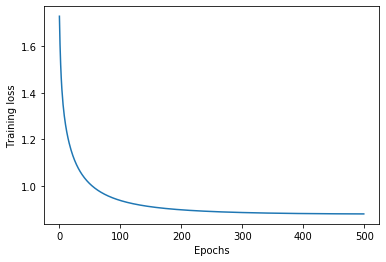

In [10]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [11]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [12]:
## Predicting on test set and finding accuracy
print("Predicting on test set")
y_hat_t = softmax(x_test@w)
loss = -np.sum(y_test*np.log(y_hat_t+1e-10) + (1-y_test)*np.log(1-y_hat_t+1e-10))/y_hat_t.shape[0]
print("Testing loss =",loss)
y_hat = np.zeros(y_hat_t.shape)
for i in range(0,y_hat.shape[0]):
    ind = np.argmax(y_hat_t[i])
    y_hat[i][ind] = 1
        
tot = 0.0
for i in range(0,y_hat.shape[0]):
    t = 0
    for j in range(0,y_hat.shape[1]):
        if(y_hat[i][j]!=y_test[i][j]):
            t = 1
    if(t==0):
        tot+=1
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.8106312444006278
Testing accuracy = 84.50704225352112 %
